In [1]:
data = []

H0 = 70
OmegaL = 0.7
OmegaM = 1 - OmegaL
H0 = H0 / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0
x1 = 0.1
x2 = 0

while z < 10:
    t -= 1
    x1 += c - H * x1
    x2 += c - H * x2
    z = 0.1 / (x1 - x2) - 1
    H = H0 * (OmegaM * (1+z)**3 + OmegaL)**0.5

    data.append([z, -t, x2, x2 * (1 + z)])

In [2]:
import cosmolopy.distance as cd
cosmo = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'h' : 0.70}
cosmo = cd.set_omega_k_0(cosmo)

data2 = []

z = 0
pc2ly = 3.261564
while z < 10:
    d_C = cd.comoving_distance(z, **cosmo)  * pc2ly
    d_A = cd.angular_diameter_distance(z, **cosmo)  * pc2ly
    d_T = cd.lookback_time(z, **cosmo) / 60 / 60 / 24 / 365 / 1e6
    
    data2.append([z, d_T, d_A, d_C])
    
    z += 0.1

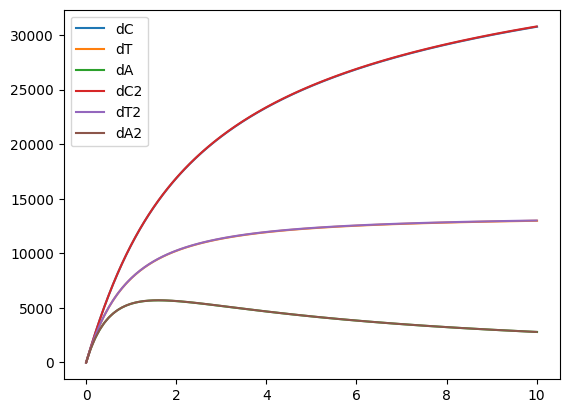

In [3]:
import matplotlib.pyplot as plt

dataz = []
dataC = []
dataA = []
dataT = []

dataz2 = []
dataA2 = []
dataC2 = []
dataT2 = []

for i in range(len(data)):
    dataz.append(data[i][0])
    dataT.append(data[i][1])
    dataA.append(data[i][2])
    dataC.append(data[i][3])

for i in range(len(data2)):
    dataz2.append(data2[i][0])
    dataT2.append(data2[i][1])
    dataA2.append(data2[i][2])
    dataC2.append(data2[i][3])

plt.plot(dataz, dataC, label = "dC")
plt.plot(dataz, dataT, label = "dT")
plt.plot(dataz, dataA, label = "dA")
    
plt.plot(dataz2, dataC2, label = "dC2")
plt.plot(dataz2, dataT2, label = "dT2")
plt.plot(dataz2, dataA2, label = "dA2")

plt.legend()
plt.show()